In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from code_.encoding_score.regression.scores_tools import *
from config import RESULTS, FIGURES

In [2]:
# choose dataset

DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

# DATASET = 'naturalscenes'
# region = 'ventral visual stream'#, ventral visual stream]

# Expansion with 256 features


In [3]:
# vit data
expansion_256_features = pd.read_csv(os.path.join(RESULTS,f'bootstrap-results-expansion_256_features-{DATASET}-{region}.csv'))
expansion_256_features['model'] = 'expansion_256_features'

# alexnet data
df_expansion = pd.read_csv(os.path.join(RESULTS,f'bootstrap-results-expansion-{DATASET}-{region}.csv'))


FileNotFoundError: [Errno 2] No such file or directory: '/home/akazemi3/Desktop/untrained_models_of_visual_cortex/results/bootstrap-results-expansion_256_features-majajhong-IT.csv'

In [47]:
df_expansion['features'] = df_expansion['features'].apply(lambda x: int(x)*36) # multiply by spatial dims
expansion_256_features['features'] = expansion_256_features['features'].apply(lambda x: int(x)*36) # multiply by spatial dims

df = pd.concat([df_expansion,expansion_256_features]).reset_index(drop=True)

names ={'expansion':'Expansion',
        'expansion_256_features':'Expansion with fixed prior channels'}
palette ={'Expansion':'royalblue',
          'Expansion with fixed prior channels':'palevioletred'}

df['model'] = df['model'].map(names)
df['color'] = df['model'].map(palette)


df = df.dropna(subset='model').reset_index()
df.score = df.score.astype(np.float32)

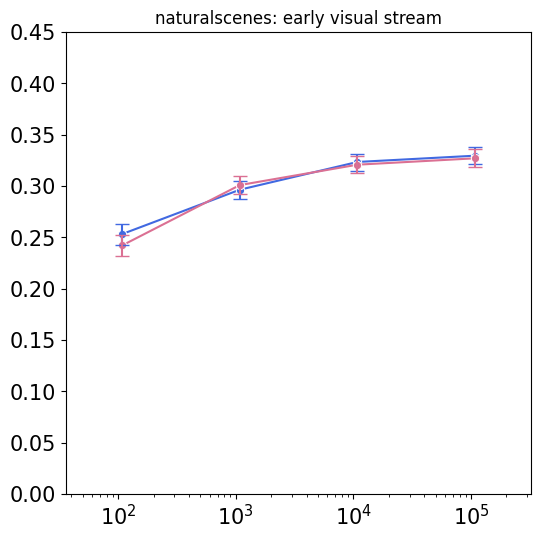

In [48]:
rcParams['figure.figsize'] = (6,6)  


# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='model', marker='o', palette = palette)
# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])   

plt.ylim(0,0.45) if DATASET == 'naturalscenes' else plt.ylim(0,0.65)
plt.xlabel('')
plt.ylabel('')
plt.xlim(df['features'].min()/3,df['features'].max()*3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")        
#ax1.legend(frameon=False,fontsize=12) if region == 'V4' else ax1.legend_.remove()
plt.title(f'{DATASET}: {region}')

if region != 'V4':
    ax1.legend()
    ax1.get_legend().remove()


plt.savefig(os.path.join(FIGURES_ADDITIONAL, f'256_features_{DATASET}_{region}.png'), dpi=200)
plt.show()

# Model Variations

In [76]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: [V4,IT], for naturalscenes: [early visual stream, midventral visual stream, ventral visual stream]

DATASET = 'naturalscenes'
region = 'ventral visual stream'#, ventral visual stream]

In [77]:
with open(os.path.join(RESULTS,f'bootstrap-results-expansion_no_relu-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_expansion_no_relu = pickle.load(file)
    df_expansion_no_relu['model'] = 'expansion_no_relu'

if region == 'V4':
    file_path = f'bootstrap-results-expansion_lrp_kaiming_normal-{DATASET}-{region}-df.pkl'
else:
    file_path = f'bootstrap-results-expansion_lrp-{DATASET}-{region}-df.pkl'
with open(os.path.join(RESULTS,file_path), 'rb') as file:
    df_expansion_lin_proj = pickle.load(file)
    df_expansion_lin_proj['model'] = 'expansion_lin_proj'
    
with open(os.path.join(RESULTS,f'bootstrap-results-expansion-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_expansion = pickle.load(file)  

with open(os.path.join(RESULTS,f'bootstrap-results-expansion_no_sp-{DATASET}-{region}-df.pkl'), 'rb') as file:
    df_expansion_no_sp = pickle.load(file)  
    df_expansion_no_sp['model'] = 'expansion_no_sp'

In [78]:
df_expansion['features'] = df_expansion['features'].apply(lambda x: int(x)*36) # multiply by spatial dims
df_expansion_no_relu['features'] = df_expansion_no_relu['features'].apply(lambda x: int(x)*36) # multiply by spatial dims
df_expansion_no_sp['features'] = df_expansion_no_sp['features'].apply(lambda x: int(x)*36) # multiply by spatial dims
df_expansion_lin_proj['features'] = df_expansion_lin_proj['features'].apply(lambda x: int(x)*36)

df = pd.concat([df_expansion, df_expansion_no_relu, df_expansion_no_sp, df_expansion_lin_proj]).reset_index(drop=True)

In [79]:
names ={'expansion':'Expansion',
        'expansion_no_relu':'No ReLU',
        'expansion_lin_proj':'Linear Projection',
        'expansion_no_sp':'No Spatial Continuity'}
palette ={'Expansion':'royalblue',
          'Linear Projection': 'slateblue',
          'No ReLU':'palevioletred',
          'No Spatial Continuity':'darkviolet'}

df['model'] = df['model'].map(names)
df['color'] = df['model'].map(palette)


df = df.dropna(subset='model').reset_index()
df.score = df.score.astype(np.float32)

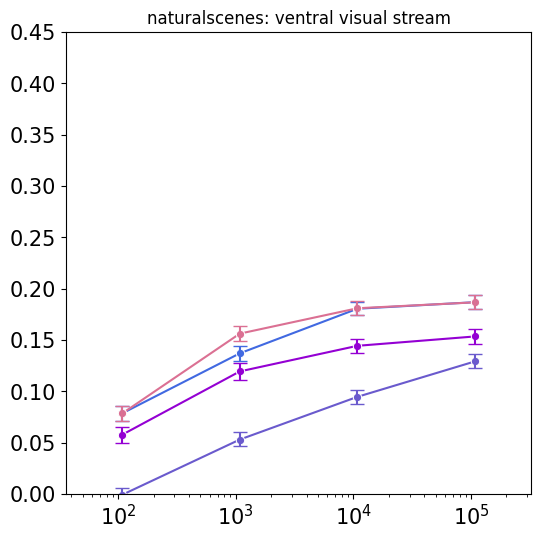

In [80]:
rcParams['figure.figsize'] = (6,6)  


# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='model', marker='o', palette = palette)
# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])   

plt.ylim(0,0.45) if DATASET == 'naturalscenes' else plt.ylim(0,0.65)
plt.xlabel('')
plt.ylabel('')
plt.xlim(df['features'].min()/3,df['features'].max()*3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")        
plt.title(f'{DATASET}: {region}')
if region != 'V4':
    ax1.legend()
    ax1.get_legend().remove()
plt.savefig(os.path.join(FIGURES_ADDITIONAL, f'additional_ablation_studies_{DATASET}_{region}.png'), dpi=200) 
plt.show()